In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
)
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_selection import SelectKBest, SelectFromModel, f_classif
# from mlxtend.plotting import plot_decision_regions

In [8]:
# import warnings filter
from warnings import simplefilter

# ignore all future warnings
simplefilter(action="ignore", category=FutureWarning)

# DataSet

In [9]:
df = pd.DataFrame(
    pd.read_csv(
        "../top_Gads_updated.dat",
        header=None,
        comment="#",
        sep="\s+",
        squeeze=True,
        names=["material", "adsorbate", "DF_lower", "DF_upper", "DF"],
    )
)

df = df[["material", "adsorbate", "DF"]]
aminoacid = df["adsorbate"].unique()

n = {}
for i in aminoacid:
    n[i] = list(df[df.adsorbate == i]["DF"])
X = pd.DataFrame(n)

X.head(5)
print(X.shape)
aminoacids_label = list(df["adsorbate"].unique())
material_label = list(df["material"].unique())

(33, 32)


# Data Preparation

In [10]:
X.rename(columns={"C3H6": "PRP", "C4H6": "BUT-2", "C4H8": "BUT-1"}, inplace=True)
X.rename(
    index={
        "C_amorph-1": "C-AM-1",
        "C_amorph-2": "C-AM-2",
        "C_amorph-3": "C-AM-3",
        "CNT15-COO--10": "CNT-COO$^{-}$-high",
        "CNT15-COO--3": "CNT-COO$^{-}$-low",
        "CNT15-COOH-30": "CNT-COOH-high",
        "CNT15-COOH-3": "CNT-COOH-low",
        "CNT15-NH2-14": "CNT-NH$_{2}$-high",
        "CNT15-NH2-2": "CNT-NH$_{2}$-low",
        "CNT15-NH3+-4": "CNT-NH$_{3}^{+}$-high",
        "CNT15-NH3+-2": "CNT-NH$^{+}_{3}$-low",
        "CNT15-OH-14": "CNT-OH-high",
        "CNT15-OH-4": "CNT-OH-low",
        "CNT15": "CNT",
        "Fe2O3-001O": "Fe$_{2}$O$_{3}$(001)",
        "graphene": "GR",
        "bi-graphene": "bi-GR",
        "tri-graphene": "tri-GR",
        "grapheneoxide": "GO",
        "redgrapheneoxide": "rGO",
        "SiO2-Q2": "SiO$_{2}$-Q2",
        "SiO2-Q4": "SiO$_{2}$-Q4",
        "TiO2-rut-110": "TiO$_{2}$-rut(110)",
        "TiO2-ana-101": "TiO$_{2}$-ana(101)",
        "TiO2-rut-100": "TiO$_{2}$-rut(100)",
        "TiO2-ana-100": "TiO$_{2}$-ana(100)",
        "TiO2-ana-101-NB": "TiO$_{2}$-ana(101)-NB",
        "ZnO-1010": "ZnO(10$\overline{1}}$0)",
        "ZnO-1210": "ZnO(1$\overline{2}}$10)",
        "ZnS-110": "ZnS(110)",
        "ZnS-110-coated": "ZnS(110)-coated",
    },
    inplace=True,
)

In [11]:
main = ["ASP", "VAL", "PRO"]
aminacid_order = [
    "ALA",
    "ARG",
    "ASN",
    "ASP",
    "CYS",
    "CYM",
    "GLN",
    "GAN",
    "GLU",
    "HID",
    "HIE",
    "HIP",
    "ILE",
    "LEU",
    "LYS",
    "MET",
    "PHE",
    "SER",
    "THR",
    "TRP",
    "TYR",
    "VAL",
    "GLY",
    "PRO",
    "CHL",
    "PHO",
    "ETA",
    "EST",
    "PRP",
    "BUT-1",
    "BUT-2",
    "DGL",
]

# Neural network modelling using MLPRegressor, hidden_layer_sizes=(10),and  activation='tanh'

In [12]:
def AminoAcid_LR(i):
    X_LR = X[main]
    Y = X[i]
    rs = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    train_score = []
    test_score = []
    train_MAE = []
    test_MAE = []
    for train_index, test_index in rs.split(X_LR):
        Xtrain = X_LR.iloc[list(train_index)]
        Ytrain = Y.iloc[list(train_index)]
        xtest = X_LR.iloc[list(test_index)]
        ytest = Y.iloc[list(test_index)]
        model = MLPRegressor(
            hidden_layer_sizes=(10),
            activation="tanh",
            alpha=0.001,
            solver="adam",
            random_state=10,
            early_stopping=False,
            verbose=False,
            max_iter=2000,
        )
        model.fit(Xtrain, Ytrain)
        Ytrain_pred = model.predict(Xtrain)
        ytest_pred = model.predict(xtest)
        train_score.append(np.round(model.score(Xtrain, Ytrain), 2))
        test_score.append(np.round(model.score(xtest, ytest), 2))
        train_MAE.append(mean_absolute_error(Ytrain, Ytrain_pred))
        test_MAE.append(mean_absolute_error(ytest, ytest_pred))
    return (
        np.round(np.average(train_score), 2),
        np.round(np.std(train_score), 2),
        np.round(np.average(test_score), 2),
        np.round(np.std(test_score), 2),
        np.round(np.average(train_MAE), 2),
        np.round(np.std(train_MAE), 2),
        np.round(np.average(test_MAE), 2),
        np.round(np.std(test_MAE), 2),
    )

In [6]:
import warnings

warnings.simplefilter("ignore")
rest = [i for i in aminacid_order if i not in main]
with open("NN_result.csv", "w") as out_file:
    out_file.write(
        "#AminoAcid, r2_avg_train, r2_std_train, r2_avg_test, r2_std_test, MAE_avg_train, MAE_std_train, MAE_avg_test, MAE_std_test"
        + "\n"
    )
    for i in rest:
        (
            r2_avg_train,
            r2_std_train,
            r2_avg_test,
            r2_std_test,
            MAE_avg_train,
            MAE_std_train,
            MAE_avg_test,
            MAE_std_test,
        ) = AminoAcid_LR(i)
        out_file.write(
            "%s %5.2f %5.2f %5.2f %5.2f %5.2f %5.2f %5.2f %5.2f\n"
            % (
                i,
                r2_avg_train,
                r2_std_train,
                r2_avg_test,
                r2_std_test,
                MAE_avg_train,
                MAE_std_train,
                MAE_avg_test,
                MAE_std_test,
            )
            + "\n"
        )

/tmp/ipykernel_28684/4046608353.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df=pd.DataFrame(pd.read_csv('NN_result.csv',header=None, comment="#",sep='\s+',
/tmp/ipykernel_28684/4046608353.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(df.AminoAcid, fontsize=12)


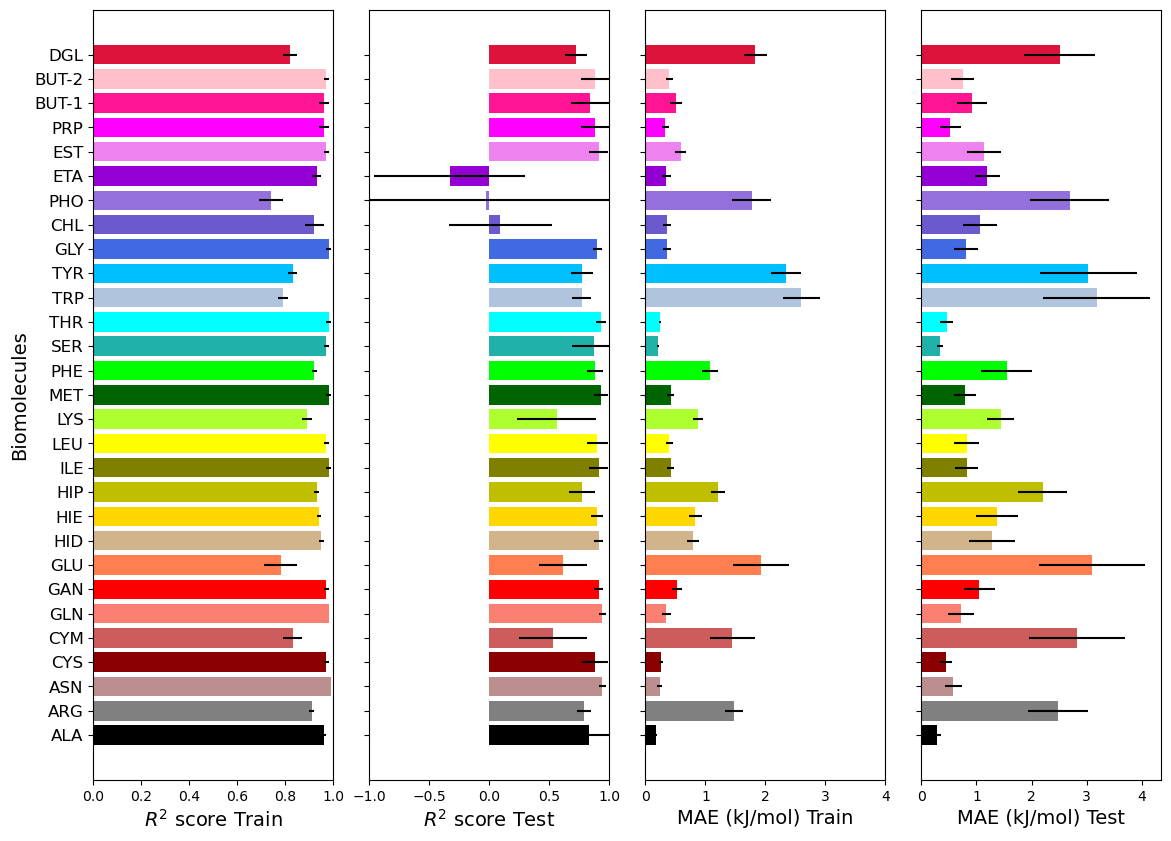

In [5]:
flatui = [
    "black",
    "grey",
    "rosybrown",
    "darkred",
    "indianred",
    "salmon",
    "red",
    "coral",
    "tan",
    "gold",
    "y",
    "olive",
    "yellow",
    "greenyellow",
    "darkgreen",
    "lime",
    "lightseagreen",
    "aqua",
    "lightsteelblue",
    "deepskyblue",
    "royalblue",
    "slateblue",
    "mediumpurple",
    "darkviolet",
    "violet",
    "magenta",
    "deeppink",
    "pink",
    "crimson",
]
fig, ax = plt.subplots(1, 4, figsize=(12, 10), sharey=True)
fig.subplots_adjust(left=0.06, right=0.95, wspace=0.15)
df = pd.DataFrame(
    pd.read_csv(
        "NN_result.csv",
        header=None,
        comment="#",
        sep="\s+",
        squeeze=True,
        names=[
            "AminoAcid",
            "r2_avg_train",
            "r2_std_train",
            "r2_avg_test",
            "r2_std_test",
            "MAE_avg_train",
            "MAE_std_train",
            "MAE_avg_test",
            "MAE_std_test",
        ],
    )
)
ax[0].barh(df.AminoAcid, df.r2_avg_train, xerr=df.r2_std_train, color=flatui)
ax[0].set_xlabel("$R^2$ score Train", fontsize=14)
ax[0].set_yticklabels(df.AminoAcid, fontsize=12)
ax[0].set_xlim(0, 1)

ax[1].barh(df.AminoAcid, df.r2_avg_test, xerr=df.r2_std_test, color=flatui)
ax[1].set_xlabel("$R^2$ score Test", fontsize=14)
ax[1].set_xlim(-1, 1)

ax[2].barh(df.AminoAcid, df.MAE_avg_train, xerr=df.MAE_std_train, color=flatui)
ax[2].set_xlabel("MAE (kJ/mol) Train", fontsize=14)
ax[2].set_xlim(0, 4)

ax[3].barh(df.AminoAcid, df.MAE_avg_test, xerr=df.MAE_std_test, color=flatui)
ax[3].set_xlabel("MAE (kJ/mol) Test", fontsize=14)
ax[2].set_xlim(0, 4)

ax[0].set_ylabel("Biomolecules", fontsize=14)
plt.savefig("NN_result.png", format="png", dpi=1000, bbox_inches="tight")

In [9]:
main = ["ASP", "VAL", "PRO", "ETA", "PHO"]

In [10]:
def AminoAcid_LR(i):
    X_LR = X[main]
    Y = X[i]
    rs = ShuffleSplit(n_splits=20, test_size=0.3, random_state=0)
    train_score = []
    test_score = []
    train_MAE = []
    test_MAE = []
    for train_index, test_index in rs.split(X_LR):
        Xtrain = X_LR.iloc[list(train_index)]
        Ytrain = Y.iloc[list(train_index)]
        xtest = X_LR.iloc[list(test_index)]
        ytest = Y.iloc[list(test_index)]
        model = MLPRegressor(
            hidden_layer_sizes=(10),
            activation="tanh",
            alpha=0.001,
            solver="adam",
            random_state=10,
            early_stopping=False,
            verbose=False,
            max_iter=2000,
        )
        model.fit(Xtrain, Ytrain)
        Ytrain_pred = model.predict(Xtrain)
        ytest_pred = model.predict(xtest)
        train_score.append(np.round(model.score(Xtrain, Ytrain), 2))
        test_score.append(np.round(model.score(xtest, ytest), 2))
        train_MAE.append(mean_absolute_error(Ytrain, Ytrain_pred))
        test_MAE.append(mean_absolute_error(ytest, ytest_pred))
    return (
        np.round(np.average(train_score), 2),
        np.round(np.std(train_score), 2),
        np.round(np.average(test_score), 2),
        np.round(np.std(test_score), 2),
        np.round(np.average(train_MAE), 2),
        np.round(np.std(train_MAE), 2),
        np.round(np.average(test_MAE), 2),
        np.round(np.std(test_MAE), 2),
    )

In [11]:
import warnings

warnings.simplefilter("ignore")
rest = [i for i in aminacid_order if i not in main]
with open("NN_result_modify.csv", "w") as out_file:
    out_file.write(
        "#AminoAcid, r2_avg_train, r2_std_train, r2_avg_test, r2_std_test, MAE_avg_train, MAE_std_train, MAE_avg_test, MAE_std_test"
        + "\n"
    )
    for i in rest:
        (
            r2_avg_train,
            r2_std_train,
            r2_avg_test,
            r2_std_test,
            MAE_avg_train,
            MAE_std_train,
            MAE_avg_test,
            MAE_std_test,
        ) = AminoAcid_LR(i)
        out_file.write(
            "%s %5.2f %5.2f %5.2f %5.2f %5.2f %5.2f %5.2f %5.2f\n"
            % (
                i,
                r2_avg_train,
                r2_std_train,
                r2_avg_test,
                r2_std_test,
                MAE_avg_train,
                MAE_std_train,
                MAE_avg_test,
                MAE_std_test,
            )
            + "\n"
        )

/tmp/ipykernel_28684/3291308028.py:7: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df=pd.DataFrame(pd.read_csv('NN_result_modify.csv',header=None, comment="#",sep='\s+',
/tmp/ipykernel_28684/3291308028.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(df.AminoAcid, fontsize=12)


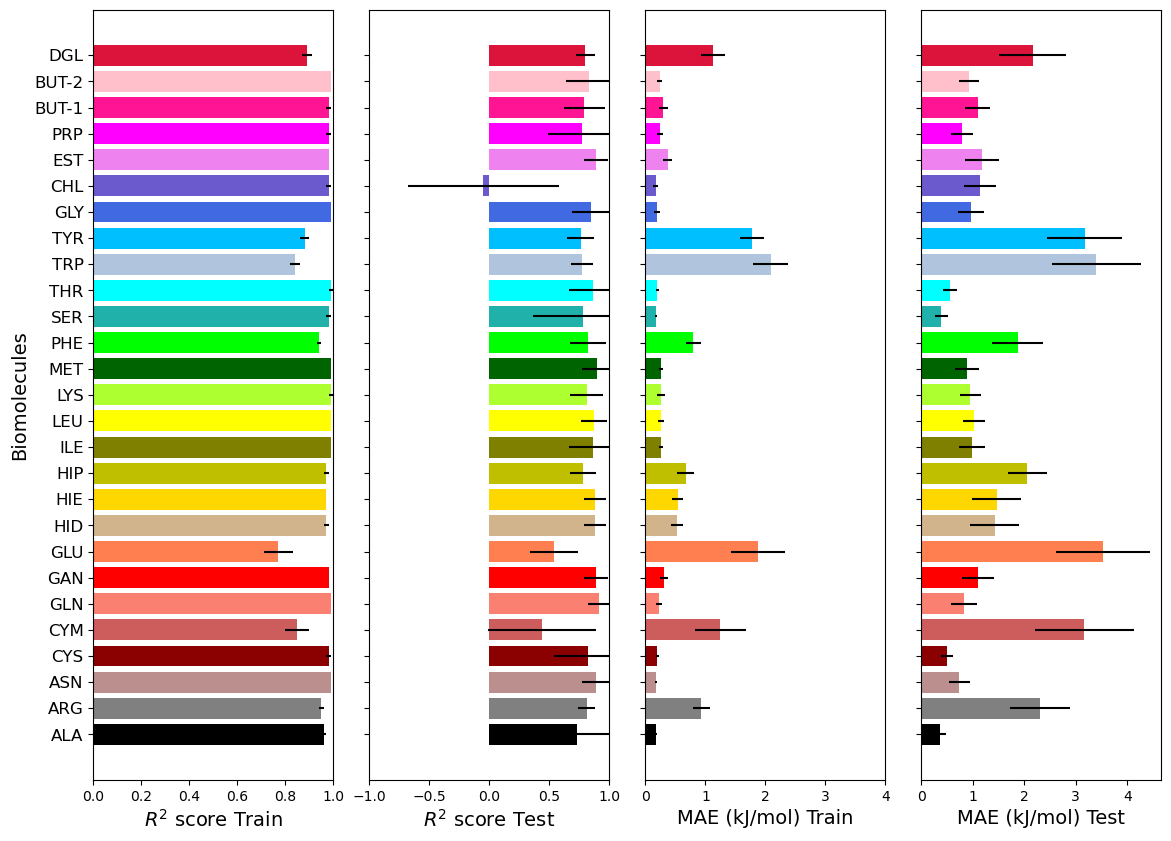

In [6]:
flatui = [
    "black",
    "grey",
    "rosybrown",
    "darkred",
    "indianred",
    "salmon",
    "red",
    "coral",
    "tan",
    "gold",
    "y",
    "olive",
    "yellow",
    "greenyellow",
    "darkgreen",
    "lime",
    "lightseagreen",
    "aqua",
    "lightsteelblue",
    "deepskyblue",
    "royalblue",
    "slateblue",
    "violet",
    "magenta",
    "deeppink",
    "pink",
    "crimson",
]

fig, ax = plt.subplots(1, 4, figsize=(12, 10), sharey=True)
fig.subplots_adjust(left=0.06, right=0.95, wspace=0.15)
df = pd.DataFrame(
    pd.read_csv(
        "NN_result_modify.csv",
        header=None,
        comment="#",
        sep="\s+",
        squeeze=True,
        names=[
            "AminoAcid",
            "r2_avg_train",
            "r2_std_train",
            "r2_avg_test",
            "r2_std_test",
            "MAE_avg_train",
            "MAE_std_train",
            "MAE_avg_test",
            "MAE_std_test",
        ],
    )
)
ax[0].barh(df.AminoAcid, df.r2_avg_train, xerr=df.r2_std_train, color=flatui)
ax[0].set_xlabel("$R^2$ score Train", fontsize=14)
ax[0].set_yticklabels(df.AminoAcid, fontsize=12)
ax[0].set_xlim(0, 1)

ax[1].barh(df.AminoAcid, df.r2_avg_test, xerr=df.r2_std_test, color=flatui)
ax[1].set_xlabel("$R^2$ score Test", fontsize=14)
ax[1].set_xlim(-1, 1)
ax[2].barh(df.AminoAcid, df.MAE_avg_train, xerr=df.MAE_std_train, color=flatui)
ax[2].set_xlabel("MAE (kJ/mol) Train", fontsize=14)
ax[2].set_xlim(0, 4)
ax[3].barh(df.AminoAcid, df.MAE_avg_test, xerr=df.MAE_std_test, color=flatui)
ax[3].set_xlabel("MAE (kJ/mol) Test", fontsize=14)
ax[2].set_xlim(0, 4)

ax[0].set_ylabel("Biomolecules", fontsize=14)
plt.savefig("NN_result_modify.png", format="png", dpi=1000, bbox_inches="tight")

# Predicted vs Real vales for testing data set (one of 10)

In [22]:
main = ["ASP", "VAL", "PRO", "ETA", "PHO"]
rest = [i for i in aminacid_order if i not in main]
X_LR = X[main]


def Mary_pred(i):
    Y = X[i]
    Xtrain, xtest, Ytrain, ytest = train_test_split(
        X_LR, Y, test_size=0.3, random_state=130
    )
    model = MLPRegressor(
        hidden_layer_sizes=(10),
        activation="tanh",
        alpha=0.1,
        solver="adam",
        random_state=10,
        early_stopping=False,
        verbose=False,
        max_iter=10000,
    )
    model.fit(Xtrain, Ytrain)
    ytest_pred = model.predict(xtest)
    test_score = np.round(model.score(xtest, ytest), 2)
    d = {
        "Aminoacid": i,
        "Predict": list(ytest_pred),
        "Real": list(ytest),
        "score": test_score,
        "Method": "NN",
    }
    return d

In [23]:
df_list = []
for i in rest:
    df = pd.DataFrame.from_dict(Mary_pred(i))
    df_list.append(df)
result = pd.concat(df_list, ignore_index=True)
result.to_csv("NN_ypredict-yreal.csv")